In [22]:
import numpy as np
import numpy.linalg as linalg
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt



In [23]:
def error_cuadratico(X,y):
    theta = (np.linalg.inv(X.T @ X) @ X.T @ y)
    return theta

def error_cuadratico_medio(y,ytrain):
    rms = mean_squared_error(y, ytrain)
    return rms


In [24]:
data = pd.read_csv('datos.csv',sep=';')

In [25]:
X = data.iloc[:,0:2]  #selecciono edad y temperatura
ones = np.ones([X.shape[0],1]) #columnas de unos
X = np.concatenate((ones,X),axis=1) #uno la matriz de unos con X

y = data.iloc[:,2:3].values #variable dependiente
theta = np.zeros([1,3])


In [26]:
#separando datos por entrenamiento y test

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)   #70%

In [27]:
regresion = error_cuadratico(X,y)
print("\nlos betas de regresion son: ",regresion)

regresion_test = error_cuadratico(xtest,ytest)
print("\nlos betas de test son: ", regresion_test)


regresion_train = error_cuadratico(xtrain,ytrain)
print("\nlos betas de train son: ",regresion_train)



los betas de regresion son:  [[3904.26601675]
 [  26.24068177]
 [-106.41363636]]

los betas de test son:  [[5381.26796524]
 [  24.90568693]
 [-160.41291875]]

los betas de train son:  [[2611.32383952]
 [  28.45908457]
 [ -62.69552593]]


In [28]:
###error cuadratico medio

eregresion = error_cuadratico_medio(regresion,regresion_test)
print("\nerror cuadratico medio es para entrenamiento: ",eregresion)



eregresion_train = error_cuadratico(regresion,regresion_train)
print("\nerror cuadratico medio train es: ",eregresion_train)



error cuadratico medio es para entrenamiento:  728150.8201788558

error cuadratico medio train es:  [[0.66879823]]


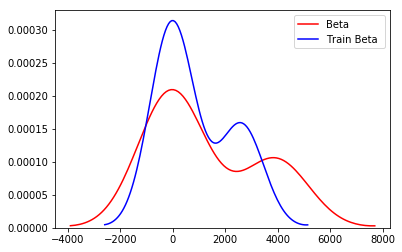

In [29]:
##comparacion beta sin entrenar con beta entrenado

import seaborn as sns

ax1 = sns.distplot(regresion, hist=False, color="r", label="Beta")
sns.distplot(regresion_train, hist=False, color="b", label="Train Beta " , ax=ax1)